In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\91844\\Insurance_Premium_Prediction\\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.sample(5)

,age,sex,bmi,children,smoker,region,expenses
65,19,female,28.9,0,no,southwest,1743.21
195,19,male,30.6,0,no,northwest,1639.56
887,36,female,30.0,0,no,northwest,5272.18
275,47,female,26.6,2,no,northeast,9715.84
498,44,female,24.0,2,no,southeast,8211.10


In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
data.shape

(1338, 7)

In [8]:
# check null value in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data["sex"].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [11]:
data["smoker"].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [13]:
# Convert columns from the string [sex,smoker,region ] to Numerical values
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [14]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [17]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [19]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
data['region']=data['region'].map({'southwest':1, 'southeast':2,'northwest':3,'northeast':4})

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [31]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Store features matrix in X and response(target) in vector Y

In [32]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

Import the dependenecies

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

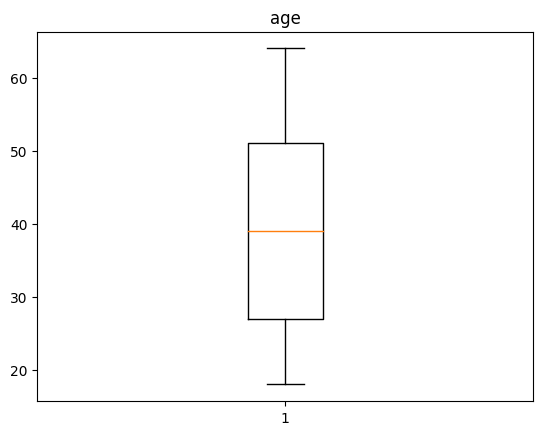

<Figure size 200x200 with 0 Axes>

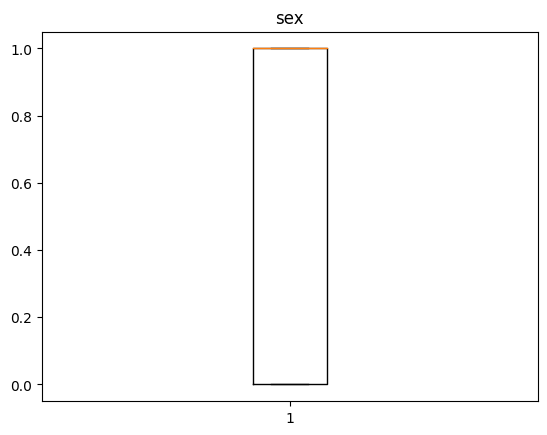

<Figure size 200x200 with 0 Axes>

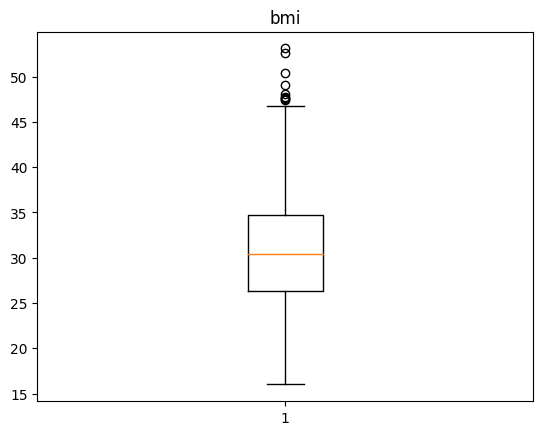

<Figure size 200x200 with 0 Axes>

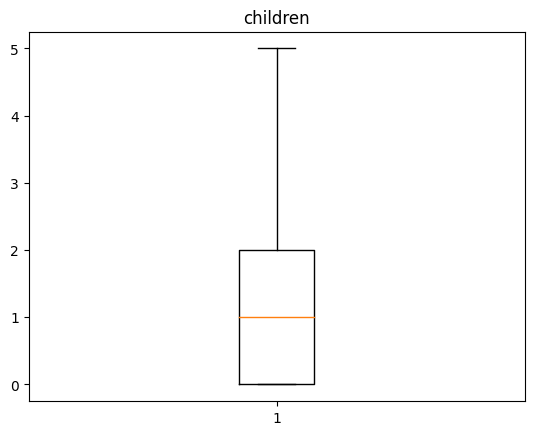

<Figure size 200x200 with 0 Axes>

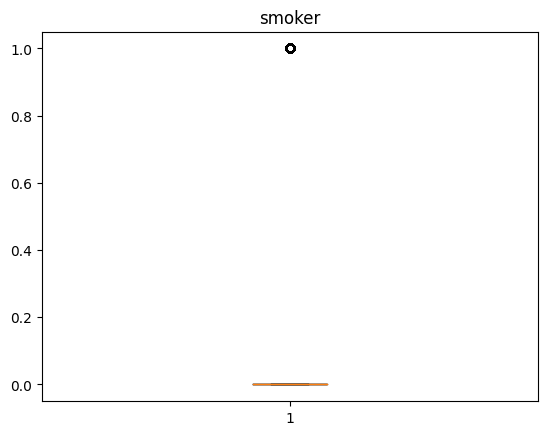

<Figure size 200x200 with 0 Axes>

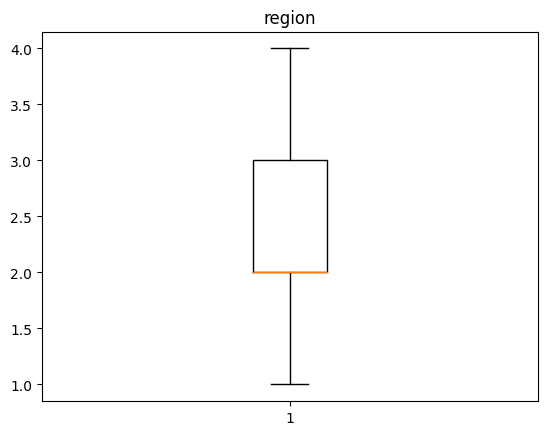

<Figure size 200x200 with 0 Axes>

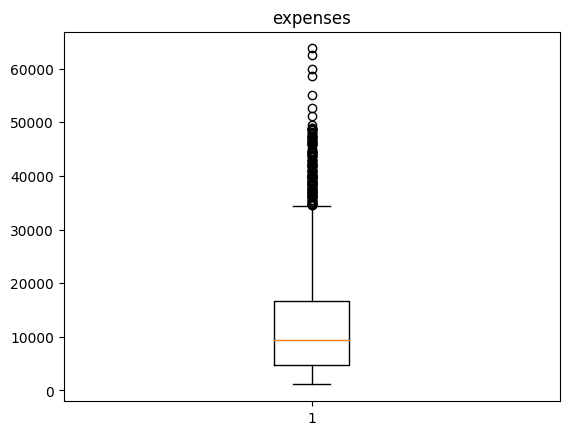

<Figure size 200x200 with 0 Axes>

In [34]:
for col in data.columns:
    plt.boxplot(data[col])
    plt.title(col)
    plt.figure(figsize=(2,2))
    plt.show()

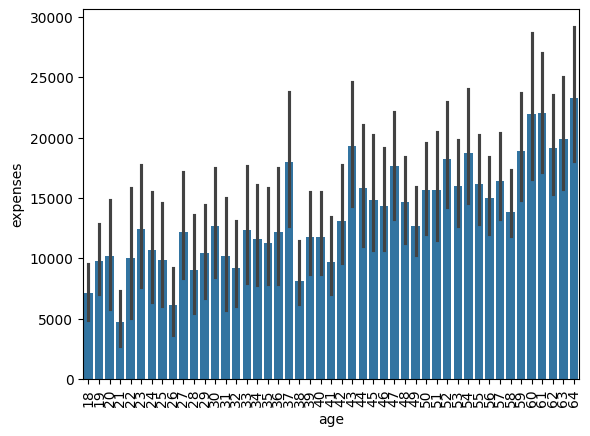

In [35]:
sns.barplot(x=data['age'], y=data['expenses'],fill=True)
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

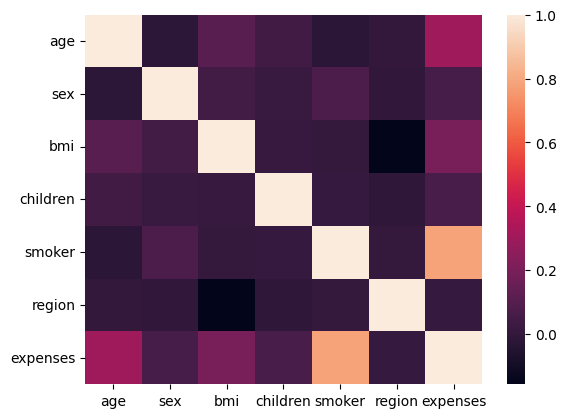

In [36]:
data.corr(numeric_only=True)['expenses']
sns.heatmap(data.corr(numeric_only=True))

Import the models

# Train test split
1.Split data into two part : a training set and a testing set<br>
2.Train the model(s) on training set<br>
3.Test the model(s) on testing set<br>

In [37]:
# separating independent variables and dependent(target) variable

X = data.drop(["expenses"],axis=1)

In [38]:

y = data['expenses']

In [39]:

X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [40]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


In [43]:
x_train.shape

(1070, 6)

In [44]:
x_test.shape


(268, 6)

Linear Regression

In [45]:
step1 = StandardScaler() 
step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.7833214205203847
MAE score  4186.9401063170135


Ridge Regression

In [46]:
step1 = StandardScaler() 
step2 = Ridge()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.7832789709998402
MAE score  4188.403011042535


Lasso Regresssion



In [47]:
step1 = StandardScaler() 
step2 = Lasso()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.7833045151713598
MAE score  4187.054780221619


KNN



In [48]:
step1 = StandardScaler() 

regressor = KNeighborsRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('regressor', regressor)
])

# Define the hyperparameter grid
param_grid = {
    "regressor__n_neighbors":[1,3,5,7,9,11,15,25,35,75,101],
    "regressor__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform grid search
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=True, refit=True)
grid_search.fit(x_train, y_train)


print(grid_search.best_params_)

# summarize best
print('Best R2: %.3f'  % grid_search.best_score_)
print('Best Config: %s' % grid_search.best_params_)

y_pred = grid_search.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 44 candidates, totalling 220 fits
{'regressor__algorithm': 'brute', 'regressor__n_neighbors': 9}
Best R2: 0.800
Best Config: {'regressor__algorithm': 'brute', 'regressor__n_neighbors': 9}
R2 score  0.8377186469681287
MAE score  3086.997524875622


SVR



In [49]:
step1 = StandardScaler() 
step2 = SVR()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  -0.06822018724199541
MAE score  8599.332364323878


Decision Tree Regressor



In [50]:
step1 = StandardScaler() 
step2 = DecisionTreeRegressor()

pipe_DT = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    "step2__splitter": ['best', 'random'],
    "step2__max_depth" : [3,4,5,6,7,8,9,10,11,12,13,14,15]
}


grid_search = GridSearchCV(pipe_DT, param_grid, cv=5, n_jobs=-1, verbose=True, refit=True)
grid_search.fit(x_train, y_train)


print(grid_search.best_params_)

# summarize best
print('Best R2: %.3f'  % grid_search.best_score_)
print('Best Config: %s' % grid_search.best_params_)

y_pred = grid_search.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

Fitting 5 folds for each of 26 candidates, totalling 130 fits
{'step2__max_depth': 4, 'step2__splitter': 'best'}
Best R2: 0.837
Best Config: {'step2__max_depth': 4, 'step2__splitter': 'best'}
R2 score  0.8642386719351669
MAE score  2698.974282641308


Random Forest Regressor



In [51]:
step1 = StandardScaler() 
step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8663347650446218
MAE score  2493.8254894402985


Gradient Boost



In [53]:
step1 = StandardScaler() 
step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8757569968489176
MAE score  2486.734399573568


In [54]:
scaler = StandardScaler()
print(scaler.fit_transform(x_train))

[[ 0.47222651 -1.0246016  -1.74857248  0.73433626 -0.50874702  0.45611589]
 [ 0.54331294 -1.0246016  -1.03670397 -0.91119211 -0.50874702  1.35325561]
 [ 0.8987451  -1.0246016  -0.93737348 -0.91119211 -0.50874702 -0.44102382]
 ...
 [ 1.3252637   0.97598911 -0.88770823 -0.91119211 -0.50874702  1.35325561]
 [-0.16755139 -1.0246016   2.82063006  0.73433626  1.96561348 -1.33816354]
 [ 1.1120044   0.97598911 -0.1096194  -0.91119211 -0.50874702 -1.33816354]]


XGBoost



In [55]:
step1 = StandardScaler() 
step2 = XGBRegressor()

pipe = Pipeline([
    ('step1_fit_transform', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8392196751256614
MAE score  2803.549170053966


Creating Final model



In [59]:
step1 = StandardScaler() 
step2 = DecisionTreeRegressor(max_depth=4,splitter="best")

pipe_DT = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe_DT.fit(x_train, y_train)
y_pred = pipe_DT.predict(x_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.8642386719351669
MAE score  2698.974282641308


In [60]:
import pickle
pickle.dump(pipe_DT, open('DecisionTreemodel.pkl','wb'))

In [62]:
# Testing the this data and model pridict the insurance price 
new_data = {
    'age':18,
    'sex':0,
    'bmi':26.3,
    'children':0,
    'smoker':0,
    'region':4
}

new_y_pred = pipe_DT.predict(pd.DataFrame(new_data,index=[0]))
print(new_y_pred)

[2757.94570175]
